# Explore (Exploratory Data Analysis or EDA) 

What is it?

- We explore the interactions of the attributes and target variable
- Pipeline: Plan - Acquire - Prepare - **Explore** - Model - Deliver

What do we care?

- Learn the vast majority of our takeaways and interesting stories from the data
- This section of the pipeline allows us to provide business insights
- This section determine which features to send into our model 

### Overall Process

Acquire
- get the data into a dataframe 

Prepare
- perform univariate stats
- clean up your data
- split your data

Explore
- work only with train data
- explore features
    - bivariate stats
    - multivariate stats
- final takeaways from this section

Model
- to be discussed!

### Explore features process

1. Hypothesize
    - Write out your question about how your features interact with each other or with the target variable
    - Write this in normal language (not a statistical hypotheses)


2. Visualize
    - Plot the features in your question
    - Use the appropriate plot for your types of varibles (categorical vs continuous)


3. Analyze (with statistics)
    - Test your question with a statistical test
    - Use the appropriate statistical tests for your types of varibles (categorical vs continuous)


4. Summarize
    - Write the takeaway from your question, plot, and stats test

### Guidance for explore features process

1. Univariate Stats
    - single variable
    - histograms
    - valuecounts
    - look for normal distributions
    - identify outliers
    

2. Bivariate Stats
    - two variables
    - plot the interactions of two variables


3. Multivariate Stats 
    - more than 2 variables
    - use color to represent a categorical variable
    - ensure the plot selected is appropriate for the other variables


4. Statistical Tests
    - continuous to continuous: correlation
    - categorical to categorical: chi^2 
    - continuous to categorical: ttest or appropriate comparing means

## Continue with the Titanic Dataset

In [7]:
import acquire
import prepare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#data wrangling imports

#vizualizations 

#stats

#my files


## Acquire

In [3]:
#get the data using my function in my acquire file
titanic_df = acquire.get_titanic_data()
titanic_df = prepare.prep_titanic(titanic_df)

In [4]:
#look at it
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone                    891 non-null    int64  
 7   sex_male                 891 non-null    uint8  
 8   embark_town_Queenstown   891 non-null    uint8  
 9   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


## Prepare

In [9]:
#clean and split my data using my function in my prepare file
train, validate, test =  prepare.split_data(titanic_df, 'survived')

In [10]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0
380,1,1,42.0,0,0,227.5250,1,0,0,0
492,0,1,55.0,0,0,30.5000,1,1,0,1
55,1,1,NaN,0,0,35.5000,1,1,0,1
243,0,3,22.0,0,0,7.1250,1,1,0,1


### Univariate Stats

In [11]:
col_cat = []
col_num = []

for col in train.columns[:-3]:
    if train[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(train[col].unique()) < 4:
            col_cat.append(col)
        else:
            col_num.append(col)

In [12]:
col_cat

['survived', 'pclass', 'alone']

In [13]:
col_num

['age', 'sibsp', 'parch', 'fare']

#### categorical variables

SURVIVED
0    329
1    205
Name: survived, dtype: int64
0    0.616105
1    0.383895
Name: survived, dtype: float64


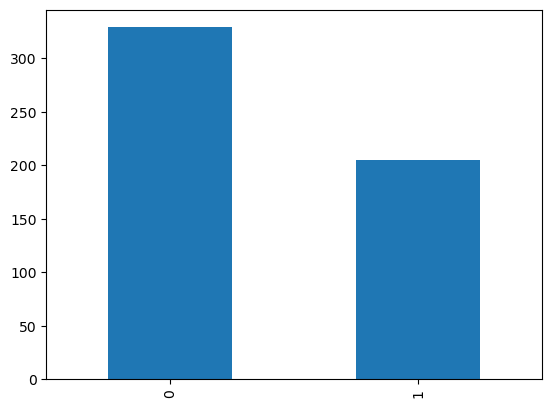


PCLASS
3    295
1    122
2    117
Name: pclass, dtype: int64
3    0.552434
1    0.228464
2    0.219101
Name: pclass, dtype: float64


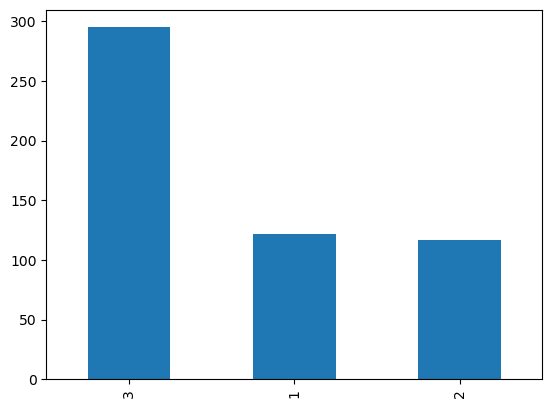


ALONE
1    335
0    199
Name: alone, dtype: int64
1    0.627341
0    0.372659
Name: alone, dtype: float64


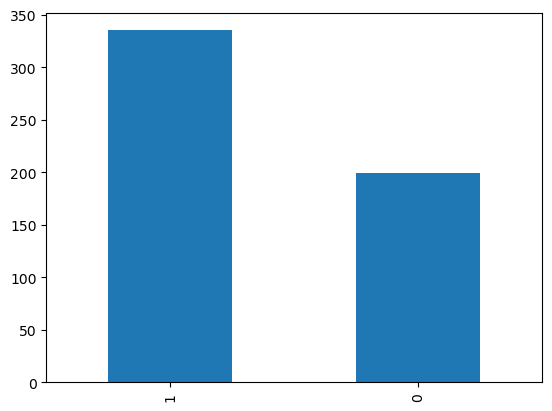

In [14]:
for col in col_cat:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True))
    train[col].value_counts().plot.bar()
    plt.show()
    print()

Takeaways


#### numeric variables

AGE
24.00    20
28.00    19
21.00    18
18.00    17
22.00    16
         ..
66.00     1
20.50     1
32.50     1
0.92      1
0.83      1
Name: age, Length: 83, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


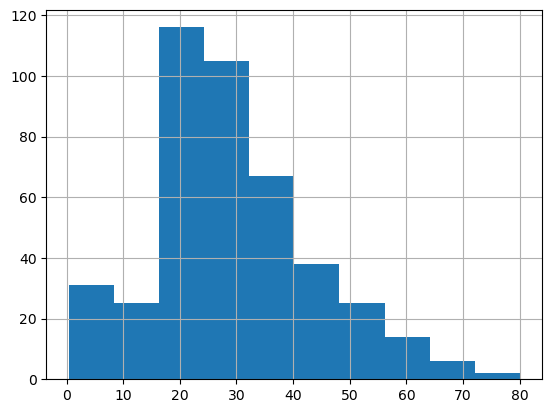

SIBSP
0    378
1    106
2     22
3     10
4     10
8      5
5      3
Name: sibsp, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


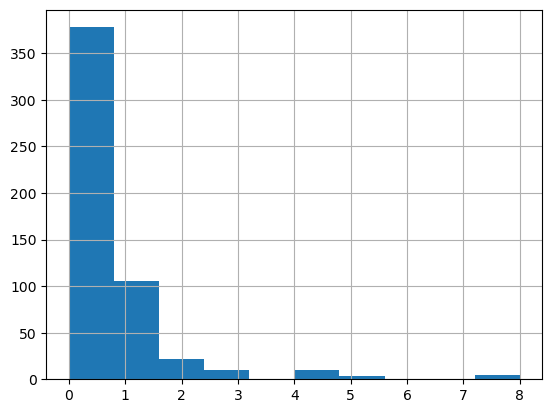

PARCH
0    414
1     67
2     45
3      4
5      3
4      1
Name: parch, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


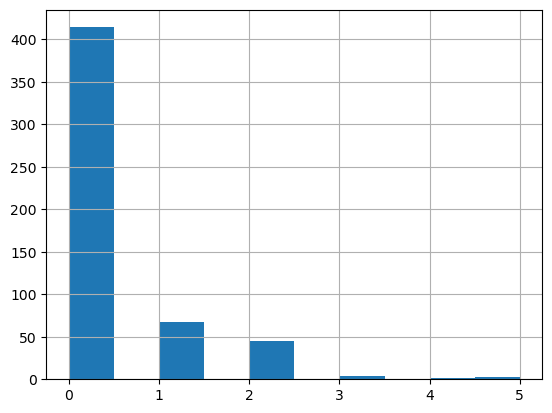

FARE
13.0000    27
7.8958     26
8.0500     25
7.7500     21
26.0000    17
           ..
8.6833      1
25.9250     1
14.4000     1
7.8875      1
78.2667     1
Name: fare, Length: 197, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


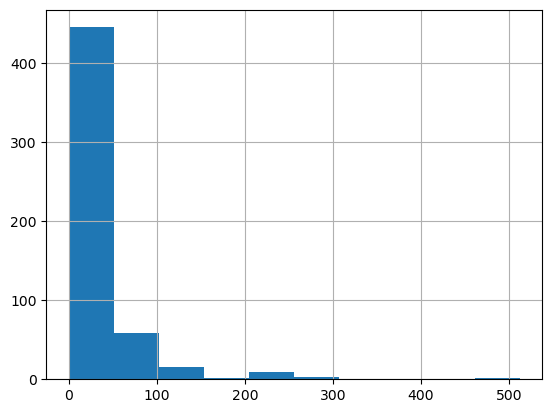

In [15]:
for col in col_num:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].hist())
    plt.show()

Takeaways

there are no noteable issues<br>
these are my catagorical variables<br>
survived is my target variable<br>
and has more people who didnt survive<br>
not a normal distribution for fare<br>
bin higher values and see if it is normally distributed<br>

### Bivariate Stats
-USE TRAIN DATASET ONLY-

1. Hypothesize
2. Visualize
3. Analyze (with statistics)
4. Summarize

In [16]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0
380,1,1,42.0,0,0,227.5250,1,0,0,0
492,0,1,55.0,0,0,30.5000,1,1,0,1
55,1,1,NaN,0,0,35.5000,1,1,0,1
243,0,3,22.0,0,0,7.1250,1,1,0,1


#### 1. Hypothesize

Q: does pclass affect wether or not someone survived?

what type of variables am i comparing?<br>
pclass and survived

#### 2. Visualize

what type of plot can i use for this?

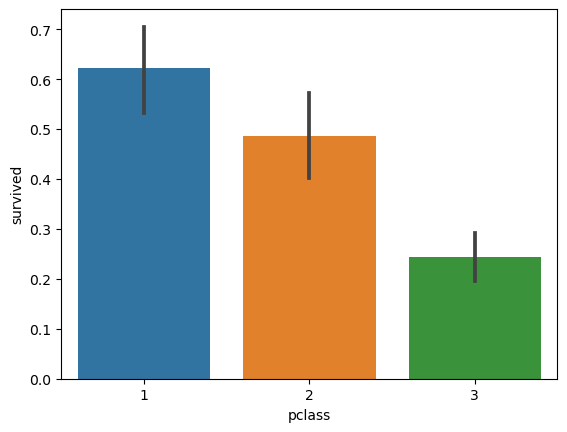

In [21]:
sns.barplot(data = train, x='pclass', y= 'survived')
plt.show()



#### 3. Analyze (with stats)

what type of stats test should i use for this?


$H_0$: plcass is independed of survived

$H_a$: pclass is dependent on survived

alpha = .05

In [24]:
observed = pd.crosstab(train.pclass, train.survived)

In [25]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [26]:
p

1.4382038993307037e-13

#### 4. Summarize

p value is less than alpha therefore we reject the null hypotheis<br>

there is a relationship between pclass and survived

### Repeat

In [28]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0
380,1,1,42.0,0,0,227.5250,1,0,0,0
492,0,1,55.0,0,0,30.5000,1,1,0,1
55,1,1,NaN,0,0,35.5000,1,1,0,1
243,0,3,22.0,0,0,7.1250,1,1,0,1


#### 1. Hypothesize

Q: does fare indicate whether or not someone survived?

what type of variables am i comparing?<br>
fare and survived<br>
fare is continuous<br>
surived is catagorical<br>



#### 2. Visualize

what kind of plot can i use? 


-boxplot<br>
-swarmplot<br>
-violinplot<br>
-stripplot

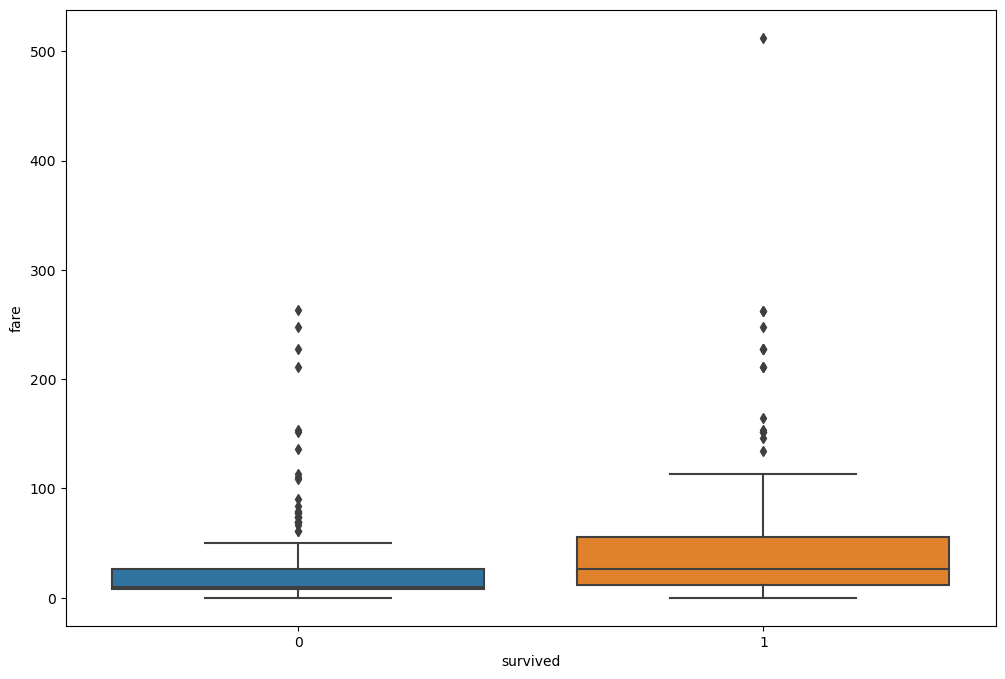

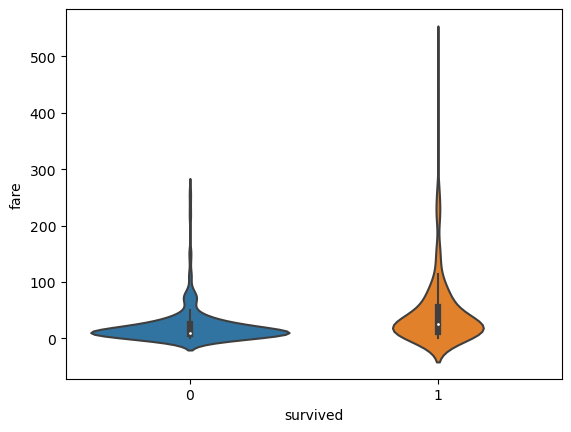

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='survived',y='fare')
plt.show()
sns.violinplot(data=train, x='survived',y='fare')
plt.show()


#### 3. Analyze (with statistics)

what type of test should i use for this?<br>
-ttest

is my continuous value normally distributed?<br>
-no, so this means we cant use t test<br>


am i comparing subpopulations to each other or a subpopulation to an overall population?<br>
-we are comparing subpopulatins to each other<br>
stats test I am moving forward with<br>
a mann-whitney


$H_0$: the mean of fare for people who survived and who didnt survive is the same

$H_a$: the mean of fare for people who survived and who didnt survive is not the same


alpha = 0.05

In [37]:

surv_no_fare = train [train.survived == 0].fare
surv_yes_far = train [train.survived == 1].fare

In [40]:
t, p = stats.mannwhitneyu(surv_no_fare, surv_yes_far)
p

6.831548944972857e-13

#### 4. Summarize

there is a difference in the fare for people who did survive and the people who didnt<br>
we reject the null hypothesis

### Multivariate Stats
-USE TRAIN DATASET ONLY-

- can ask more targeted questions, like subgroup vs subgroup vs category
- multivariate statistical tests exist, but are outside the scope of this course.

1. Hypothesize
2. Visualize
3. ~Analyze (with statistics)~
4. Summarize


In [41]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,1,3,29.0,0,0,7.8958,1,1,0,0
380,1,1,42.0,0,0,227.5250,1,0,0,0
492,0,1,55.0,0,0,30.5000,1,1,0,1
55,1,1,NaN,0,0,35.5000,1,1,0,1
243,0,3,22.0,0,0,7.1250,1,1,0,1


#### 1. Hypothesize

Q: do males have a greater chance of survival when traveling alone?

- sex categorical
- alone categorical
- survived categorical

#### 2. Visualize

<AxesSubplot:xlabel='sex_male', ylabel='survived'>

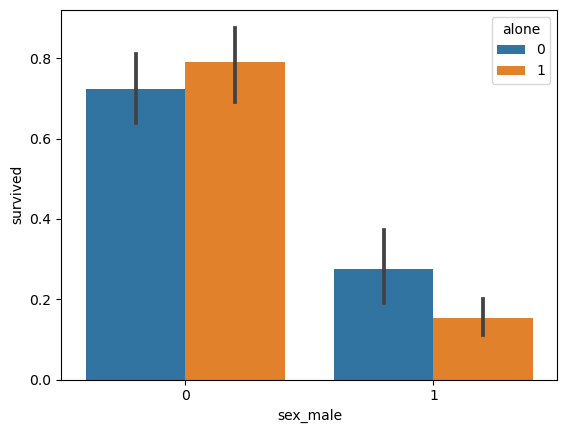

In [44]:
sns.barplot(data =train, x= 'sex_male', y='survived', hue='alone')

#### 3. Summarize

## summary of all the takeaways

- passenger class affected survival rate
- fare affected survival rate 
- males survived way less than females and, were least likely to survive when traveling alone

## Explore Conclusions

### Final notes on exploring

How much time do you think it will take to explore all of your features and how they relate to your target variable? 

- alot of time
- therefore prioritize the features you want to compare
- use domain knowlege to know where to prioritize
- rotate through relationships with a for loop(at the beginning of explore)

### With more time, reiterate
As you have more time, you can reiterate and go back through and investigate more features. 

Recall how we dropped the age column completetly since 20% of the values were missing? 
- add back that column 
    - maybe drop all the rows with nulls instead
    - maybe try to replace those null values with some other value, maybe by group?
- investigate how age affects survival now

### Make sure you're documenting takeaways throughout your exploration! 